In [8]:
import sklearn
from sklearn import metrics
import numpy as np
import pickle
import os
from tensorflow import keras
import matplotlib.pyplot as plt


## Preparing Data
60% training, 20% validation, and 20% testing

In [3]:
# TODO: Move these two functions to a shared file for helper functions
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("comments","X_comments_sub.pkl"))
y_data = unPickleData(getDataPath("comments","Y_comments_sub.pkl"))

n = len(x_data)
x_data_training = x_data[:int(0.6*n)]
x_data_validation = x_data[int(0.6*n):int(0.8*n)]
x_data_testing = x_data[int(0.8*n):]

y_data_training = np.array(y_data[:int(0.6*n)])
y_data_validation = np.array(y_data[int(0.6*n):int(0.8*n)])
y_data_testing = np.array(y_data[int(0.8*n):])

## Training

In [42]:
model = keras.Sequential([keras.layers.Flatten(),
                keras.layers.Dense(128,activation = "relu"),                          
                keras.layers.Dense(2,activation = "sigmoid")])
                
model.add(keras.layers.Dropout(0.5))
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

history = model.fit(x_data_training, y_data_training,epochs = 100, validation_data=(x_data_validation,y_data_validation))


Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 4.2018 - accuracy: 0.6417 - val_loss: 0.6054 - val_accuracy: 0.8333
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 4.2287 - accuracy: 0.6357 - val_loss: 0.5024 - val_accuracy: 0.8333
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 4.0695 - accuracy: 0.6490 - val_loss: 0.4221 - val_accuracy: 0.8333
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 4.0321 - accuracy: 0.6236 - val_loss: 0.4589 - val_accuracy: 0.8333
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 4.1168 - accuracy: 0.6212 - val_loss: 0.6510 - val_accuracy: 0.8333
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 3.2652 - accuracy: 0.6441 - val_loss: 0.9034 - val_accuracy: 0.8333
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 2.7550 - accuracy: 0.6550 - val_loss: 1.1831 - val_accuracy: 0.8333
Epoch 8/100
2

## Learning Curve

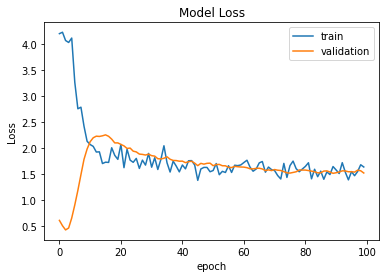

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Testing

In [44]:
y_pred = model.predict(x_data_testing)
y_pred = [0 if (d[0] > d[1]) else 1 for d in y_pred]

print(sklearn.metrics.classification_report(y_data_testing,y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(y_data_testing, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       229
           1       0.93      0.27      0.42        48

    accuracy                           0.87       277
   macro avg       0.90      0.63      0.67       277
weighted avg       0.88      0.87      0.84       277

Accuracy:  0.8700361010830325
